# Auto Correlation Function (ACF) in Detail
In [previous notebook](https://www.kaggle.com/code/alisadeghiaghili/time-series-analysis-pt-1/) I talked about **time series seasonal decomposition** and I mentioned **Auto Correlation Function (ACF)** as a way to finding the optimal period for it. In this mini notebook I am going to explain the Auto Correlation Function (ACF) in detail and show you how to use it to find the optimal period for seasonal decomposition in time series analysis. We'll use Python with examples to illustrate each step.

## What is Auto-Correlation?
Auto-Correlation is a statistical concept that measures the correlation between a [time series](https://www.kaggle.com/code/alisadeghiaghili/time-series-analysis-pt-1/) and a delayed version of itself. In time series analysis, the Auto-Correlation Function (ACF) is a plot that displays the correlation of a time series with its lagged values. It helps us understand how each data point in the series is related to its past values.

Here are key points about ACF:
1. **Lag:** In ACF, "lag" refers to the number of time units by which the series is shifted. For example, a lag of 1 corresponds to the correlation between the series at time t and the series at time t-1.
2. **Interpretation:** The ACF plot shows the correlation between the original time series and a lagged version of itself at various lags. It helps identify repeating patterns or seasonality in the data.
3. **Significance:** Statistically significant peaks in the ACF plot indicate potential seasonality or cyclic behavior. Peaks at specific lags suggest that the data is correlated at those lags.
4. **Damping:** The ACF may gradually decrease for larger lags. This is known as "damping." Damping suggests that distant values are less correlated.

In practical terms, the ACF provides a plot that displays the correlation between a time series and its lagged values at various lags. Each lag represents a delay of a specific number of time units. Here's what you need to know:

### Visualizing ACF:
- X-Axis: Represents the lags (time delays) considered.
- Y-Axis: Represents the strength of the correlation at each lag.
- Lag: As mentioned before, the lag is the number of time units by which the series is shifted. For instance, a lag of 1 corresponds to the correlation between the series at time t and the series at time t-1.

## Using ACF to Find the Optimal Period

The key question often arises: How do we specify the optimal lag for ACF analysis? The optimal lag is the delay at which the time series exhibits the strongest correlation with itself, revealing its underlying patterns. Here's how to find it:

1. **Visual Inspection:**
    Begin by plotting the ACF for a reasonable range of lags. Initially, you can set a wide range, such as 30 or 50 lags, to get a sense of the correlation structure across various lags.
2. **Significant Peaks:**
    Look for significant peaks in the ACF plot. These peaks indicate lags where the autocorrelation values are notably different from zero.
3. **Rule of Thumb:**
    A common rule of thumb is to choose the lag where the ACF plot first crosses the upper confidence interval (often represented by dashed lines in ACF plots). This crossing point indicates the lag at which the correlation is statistically significant.
4. **Periodicity Knowledge:**
    If you have prior knowledge about expected seasonality or cyclic patterns in your data, you can choose the lag that aligns with this knowledge.
5. **Experimentation:**
    If the data's seasonality is not apparent from visual inspection, try different lag values and observe the ACF plots. Choose the lag that best reveals the underlying patterns in your data.
    
    **Notice:** remember, in an Auto-Correlation Function (ACF) plot with a higher lag provides data of plots with lower lags. For example in an Auto-Correlation Function (ACF) plot with a lag of 50, it inherently contains the ACF data with a lag of 30, and much more. Each lag in the ACF plot represents the correlation between the time series and its lagged values at that specific lag. In other words:
    When you calculate and plot the ACF with a lag of 50, it provides you with autocorrelation values for lags from 0 to 50.
    Within those results, you have information about the correlation at lag 30. Additionally, you have information about the correlation at all lags from 0 to 29 and from 31 to 50.
    So, when you specify a larger lag, it includes information about all smaller lags as well. You don't need to calculate ACF separately for smaller lags; it's already included in the results of the ACF with the larger lag.
6. **Domain Expertise:**
    Domain experts may have insights into the seasonality or patterns in the data, which can guide the choice of lag.

## A Practical Example:

Let's illustrate these concepts with an example using Python and synthetic monthly temperature data with annual seasonality:

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


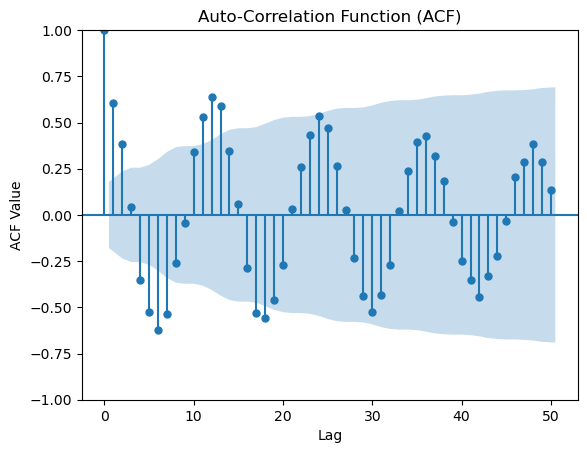

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Generate synthetic monthly temperature data with annual seasonality
np.random.seed(0)
time_index = pd.date_range(start='2020-01-01', periods=120, freq='M')
temperature_data = 20 + 2 * np.sin(2 * np.pi * np.arange(1, 121) / 12) + np.random.normal(0, 1, 120)
temperature_series = pd.Series(temperature_data, index=time_index)

# Calculate and plot ACF with a wide range of lags
plot_acf(temperature_series, lags=50)  # Set a wide range of lags
plt.title('Auto-Correlation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('ACF Value')

plt.show()

In this example, we use a wide range of lags (50) to visualize the ACF plot. By examining the plot and identifying significant peaks, we can choose the optimal lag that reveals the underlying seasonality.

## Conclusion

The Auto-Correlation Function (ACF) is a valuable tool in time series analysis, helping us uncover hidden patterns and seasonality in our data. By understanding how to interpret the ACF plot and how to determine the optimal lag, analysts can gain insights that are crucial for accurate modeling and forecasting.

When working with time series data, remember that finding the optimal lag may require a combination of data exploration, domain knowledge, and statistical analysis. The goal is to uncover the underlying patterns and structure of your data, ultimately leading to more informed decision-making and better forecasts. Please consider giving upvote to this note book and sharing it if you liked it.